In [109]:
# Import the modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [110]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv('Resources/Impact_of_Remote_Work_on_Mental_Health_Final.csv')

# Renaming Satisfaction_with_Remote_Work column
df.rename(columns={'Satisfaction_with_Remote_Work': 'Satisfaction_with_Work'}, inplace=True)

# Review the DataFrame
df.head()

,Employee_ID,Age,Gender,Job_Role,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Hybrid,47,7,Depression,No,Decrease,Unsatisfied,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,Remote,52,4,Anxiety,No,Increase,Satisfied,Weekly,Good,Asia
2,EMP0004,27,Male,Software Engineer,Onsite,32,8,Depression,Yes,Increase,Unsatisfied,NaN,Poor,Europe
3,EMP0005,49,Male,Sales,Onsite,35,12,NaN,Yes,Decrease,Unsatisfied,Weekly,Average,North America
4,EMP0006,59,Non-binary,Sales,Hybrid,39,3,NaN,No,Increase,Unsatisfied,NaN,Average,South America


In [111]:
# Create a list of the columns you want to transform
columns_to_encode = ['Productivity_Change', 'Satisfaction_with_Work', 'Gender', 'Job_Role', 'Work_Location', 
                      'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 
                      'Physical_Activity', 'Sleep_Quality', 'Region']

In [112]:
# Create dummies for the Productivity_Change column's categorical values
productivity_dummies = pd.get_dummies(df[columns_to_encode], dtype='int')

# Create dummies for the Satisfaction_with_Remote_Work column's categorical values
# satisfaction_dummies = pd.get_dummies(df['Satisfaction_with_Work'], dtype='int')

# Combine with original DataFrame
# df_combined = pd.concat([df, productivity_dummies, satisfaction_dummies], axis=1)

# df_combined.drop(['Productivity_Change', 'Satisfaction_with_Work'], axis=1, inplace=True)

# # Review the combined DF
# df_combined.head()

productivity_dummies.head()

,Productivity_Change_Decrease,Productivity_Change_Increase,Satisfaction_with_Work_Satisfied,Satisfaction_with_Work_Unsatisfied,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Job_Role_Data Scientist,Job_Role_Designer,...,Physical_Activity_Weekly,Sleep_Quality_Average,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,0,1,1,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [139]:
X.columns

Index(['Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Job_Role_Data Scientist',
       'Job_Role_Designer', 'Job_Role_HR', 'Job_Role_Marketing',
       'Job_Role_Project Manager', 'Job_Role_Sales',
       'Job_Role_Software Engineer', 'Work_Location_Hybrid',
       'Work_Location_Onsite', 'Work_Location_Remote',
       'Mental_Health_Condition_Anxiety', 'Mental_Health_Condition_Burnout',
       'Mental_Health_Condition_Depression',
       'Access_to_Mental_Health_Resources_No',
       'Access_to_Mental_Health_Resources_Yes', 'Physical_Activity_Daily',
       'Physical_Activity_Weekly', 'Sleep_Quality_Average',
       'Sleep_Quality_Good', 'Sleep_Quality_Poor', 'Region_Africa',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_Oceania', 'Region_South America'],
      dtype='object')

In [138]:
X = productivity_dummies.drop(['Satisfaction_with_Work_Satisfied', 'Satisfaction_with_Work_Unsatisfied', 'Productivity_Change_Decrease', 'Productivity_Change_Increase'], axis=1)
y = productivity_dummies['Satisfaction_with_Work_Unsatisfied']

In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [140]:
# Split the PCA Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [141]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [142]:
# Apply PCA
pca = PCA(n_components=20)
pca.fit_transform(X_scaled)

array([[ 2.03525357,  0.17628445, -0.9576425 , ...,  0.29141593,
        -0.55179371,  0.05060081],
       [-1.83260298, -0.62672446, -0.8735912 , ..., -0.03637298,
        -1.46026979,  1.91624458],
       [ 1.1799953 , -2.00972383, -1.25066855, ...,  0.87859398,
         0.20324134,  0.38662203],
       ...,
       [-1.35360012, -0.88851568,  0.80474746, ..., -0.4703765 ,
         0.22876727,  2.10447812],
       [-1.02584086, -0.34081065,  1.2148928 , ..., -0.22006444,
         0.16438133,  0.21915841],
       [-1.91058879, -0.74576145,  0.56224289, ...,  0.44838148,
        -1.23012221,  1.13205959]])

In [143]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", sum(explained_variance))

Explained variance by each component: [0.06804051 0.05500398 0.05205702 0.05174445 0.05086818 0.04995493
 0.04630367 0.04598014 0.04482576 0.04330075 0.0429148  0.0425024
 0.04075777 0.04012399 0.03971995 0.03893085 0.03840256 0.03784749
 0.03676086 0.03656199]
Total explained variance: 0.9026020486167539


In [144]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])
pca_df['Increase'] = y.reset_index(drop=True)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Increase
0,2.035254,0.176284,-0.957643,0.785809,-0.725899,1.599202,1.681290,1.125144,-1.169826,-1.116322,...,0.600987,-0.195576,-0.431014,1.258486,0.394265,0.892612,0.291416,-0.551794,0.050601,1
1,-1.832603,-0.626724,-0.873591,-2.563875,-1.109671,-0.597563,0.727280,0.053102,-1.726453,-1.790777,...,-1.468518,1.125745,-0.708175,-0.351598,0.025987,-0.134837,-0.036373,-1.460270,1.916245,0
2,1.179995,-2.009724,-1.250669,-0.433680,-0.833744,-0.916399,2.935691,0.270355,-0.560130,1.067641,...,-0.469501,-1.126300,-0.627206,1.564081,0.746693,1.439563,0.878594,0.203241,0.386622,1
3,1.535813,1.465599,-1.022894,0.679096,-0.996523,0.881979,-2.170525,-1.406871,-0.540189,0.613654,...,0.049234,0.810644,2.288476,1.195513,-0.583037,-0.717577,1.030738,-0.677292,0.284224,1
4,1.398642,-0.218202,0.211930,-0.454322,-0.244201,0.557886,0.808198,2.753846,-0.233510,1.159155,...,-1.197088,2.199534,1.457964,0.685602,-0.213874,-0.693222,-1.598835,0.994977,0.758098,1


In [145]:
model_pca = LogisticRegression(solver='lbfgs', max_iter=200, random_state=78)
model_pca.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=78)

In [146]:
predictions_pca = model_pca.predict(X_test)

print(confusion_matrix(y_test, predictions_pca))
print(classification_report(y_test, predictions_pca))
print("Accuracy:", accuracy_score(y_test, predictions_pca))

[[110 113]
 [104 120]]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       223
           1       0.52      0.54      0.53       224

    accuracy                           0.51       447
   macro avg       0.51      0.51      0.51       447
weighted avg       0.51      0.51      0.51       447

Accuracy: 0.5145413870246085


In [155]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_pca})
results_df.head()

,Actual,Predicted
169,1,0
1123,1,1
425,0,1
1124,0,0
194,1,0


In [131]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=78)

In [148]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [149]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [150]:
predictions = model.predict(X_test)

In [151]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[105 118]
 [113 111]]
              precision    recall  f1-score   support

           0       0.48      0.47      0.48       223
           1       0.48      0.50      0.49       224

    accuracy                           0.48       447
   macro avg       0.48      0.48      0.48       447
weighted avg       0.48      0.48      0.48       447



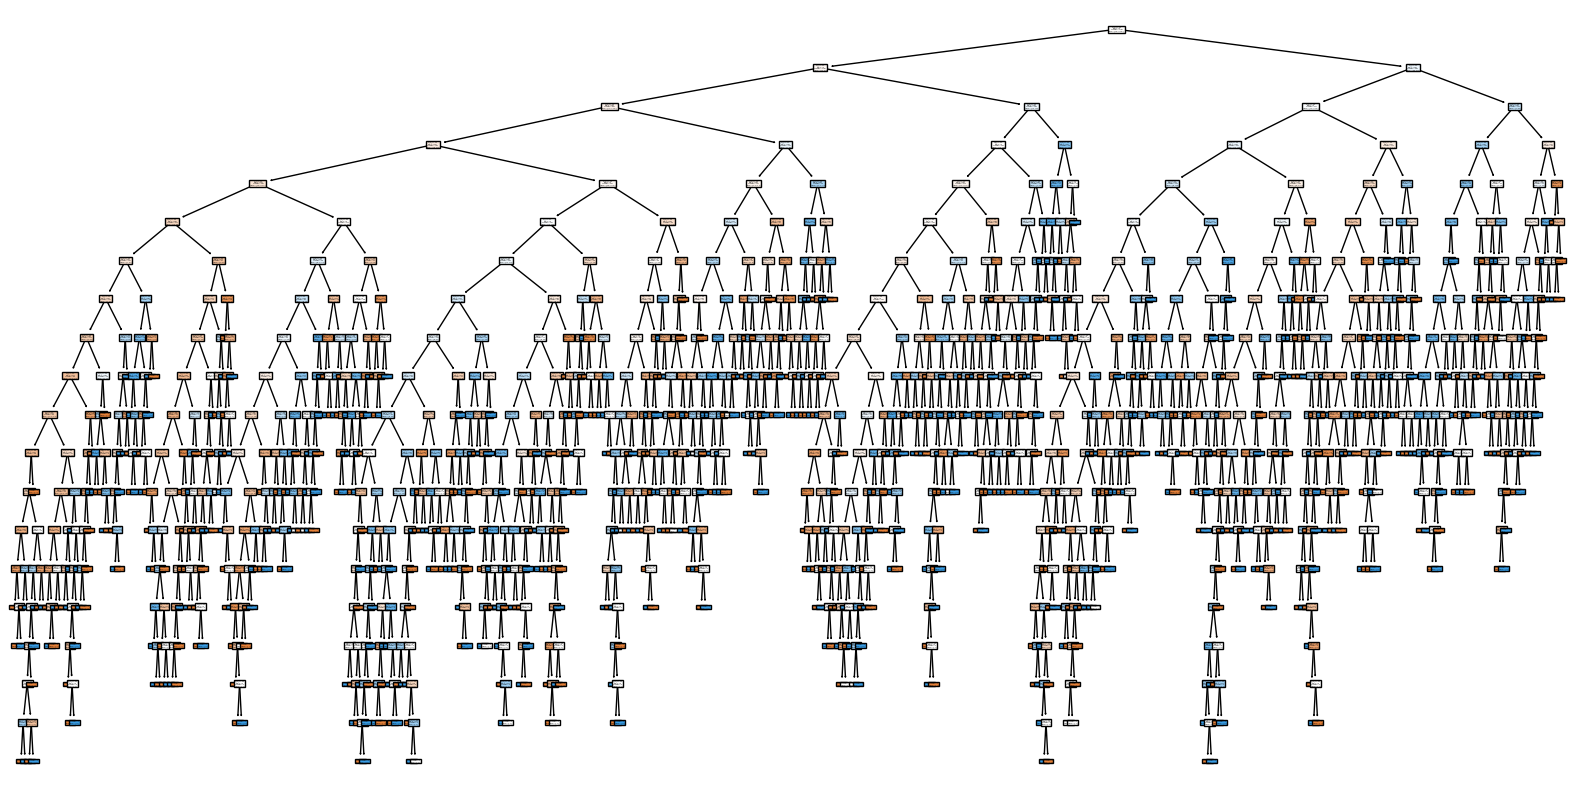

In [152]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.show()

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=78)

In [133]:
predictions = rf_model.predict(X_test)

In [134]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[145 140]
 [150 124]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       285
           1       0.47      0.45      0.46       274

    accuracy                           0.48       559
   macro avg       0.48      0.48      0.48       559
weighted avg       0.48      0.48      0.48       559

